In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
import seaborn as sns
import time

In [2]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ensure labels are integers (no one-hot encoding)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:

# Training parameters
total_steps = 31250  # Total steps (50 epochs x 625 steps per epoch)
initial_lr = 0.001  # Starting learning rate

# Define decay points and values
boundaries = [int(total_steps * 0.3), int(total_steps * 0.6), int(total_steps * 0.9)]  # Step boundaries
values = [initial_lr, 0.0005, 0.0001, 0.00005]  # Learning rates for each interval

# Create Step Decay scheduler
step_decay_schedule = PiecewiseConstantDecay(boundaries=boundaries, values=values)

# Define optimizer
optimizer = SGD(learning_rate=step_decay_schedule)

In [4]:

# Create model function
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:

from tensorflow.keras.callbacks import EarlyStopping

# Train and evaluate model
start_time = time.time()
model = create_model(optimizer)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)
end_time = time.time()

# Record training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

c:\Users\Omar Wessam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1709 - loss: 2.2454 - val_accuracy: 0.2557 - val_loss: 2.0807
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2676 - loss: 2.0547 - val_accuracy: 0.2858 - val_loss: 1.9955
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3021 - loss: 1.9791 - val_accuracy: 0.3139 - val_loss: 1.9438
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3271 - loss: 1.9337 - val_accuracy: 0.3289 - val_loss: 1.9118
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3382 - loss: 1.8995 - val_accuracy: 0.3383 - val_loss: 1.8841
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3481 - loss: 1.8738 - val_accuracy: 0.3478 - val_loss: 1.8625
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3578 - loss: 1.8510 - val_accuracy: 0.3546 - val_loss: 1.8447
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3671 - loss: 1.8369 - val_accuracy: 0.

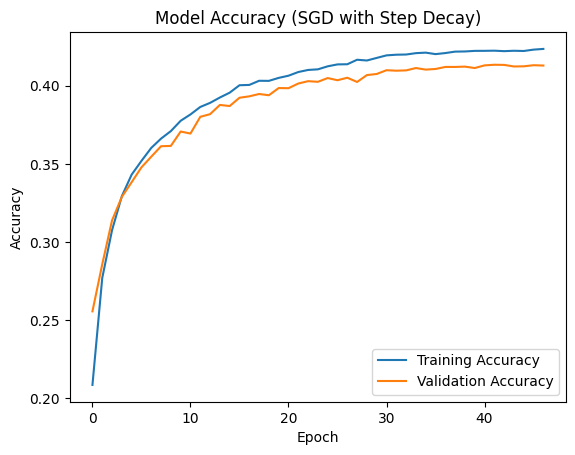

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


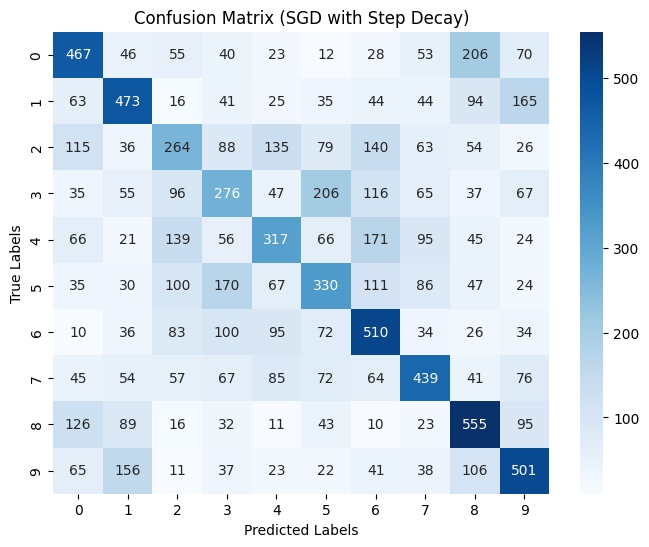

In [6]:

# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy (SGD with Step Decay)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (SGD with Step Decay)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


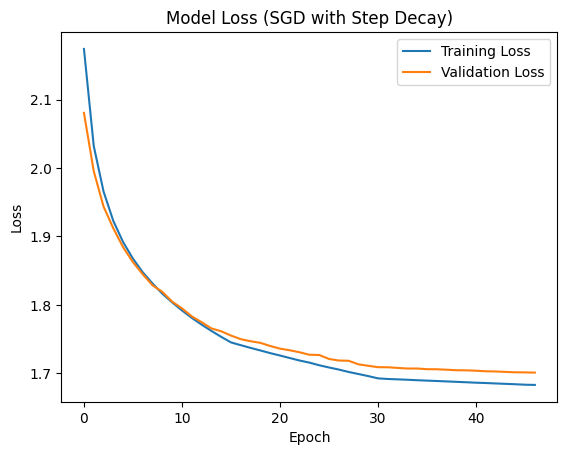

In [7]:
# Plot training and validation accuracy
accuracy = history.history['loss']
val_accuracy = history.history['val_loss']
plt.plot(accuracy, label='Training Loss')
plt.plot(val_accuracy, label='Validation Loss')
plt.title('Model Loss (SGD with Step Decay)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()